In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

from wildboar.datasets import load_dataset
from wildboar.ensemble import ShapeletForestEmbedding

In [2]:
random_state = 1234
x, y = load_dataset("GunPoint")

In [3]:
pipe = make_pipeline(
    ShapeletForestEmbedding(
        n_shapelets=1,
        min_shapelet_size=0,
        max_shapelet_size=1,
        metric="scaled_euclidean",
        sparse_output=True,
        max_depth=5,
        random_state=random_state,
        n_jobs=-1,
    ),
    LogisticRegression(solver="newton-cg", random_state=random_state),
)

In [4]:
cv = cross_validate(pipe, x, y, cv=5, scoring="accuracy", n_jobs=1)
err = 1 - np.mean(cv["test_score"])
err

0.015000000000000013

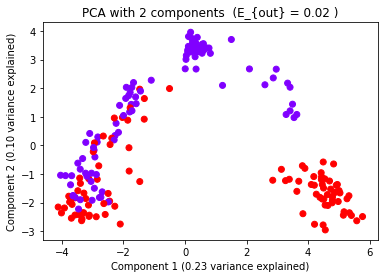

In [5]:
pca = make_pipeline(
    ShapeletForestEmbedding(
        metric="scaled_euclidean",
        sparse_output=False,
        max_depth=5,
        random_state=random_state,
    ),
    PCA(n_components=2, random_state=random_state),
)
p = pca.fit_transform(x)
var = pca.steps[1][1].explained_variance_ratio_

labels, index = np.unique(y, return_inverse=True)
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
plt.scatter(p[:, 0], p[:, 1], color=colors[index, :])
plt.xlabel("Component 1 (%.2f variance explained)" % var[0])
plt.ylabel("Component 2 (%.2f variance explained)" % var[1])
plt.title("PCA with 2 components  (E_{out} = %.2f )" % err)
plt.show()